In [4]:
#MLP code for practice
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocs
from pandas import read_csv


test_raw = read_csv('C:\Users\jp_desktop\MLP\mnist_test.csv').values
train_raw = read_csv('C:\Users\jp_desktop\MLP\mnist_train.csv').values

#nmax는 이미지 개수, dmax는 이미지 벡터 하나의 성분 개수
nmax, dmax = train_raw.shape

#데이타 정제 과정
train_data = train_raw[:,1:]
label = train_raw[:,0]
train_label = np.zeros((nmax,10)) #이건 모르겠음

for i in range(nmax):
    ind = int(label[i])
    train_label[i,ind] = 1
#ntmax는 테스트 이미지 개수, mtmax는 테스트 이미지 벡터 성분 수
ntmax, dtmax = test_raw.shape

test_data = test_raw[:,1:]#슬라이싱
label = test_raw[:,0]
test_label = np.zeros((ntmax,10))#테스트 이미지 수와 라벨 수 만큼 영행렬 만듦

for i in range(ntmax):#extract label and zero mat input
    ind = int(label[i])
   # print(ind)
    test_label[i,ind] = 1


#print('elapsed time for data reading:', t_finish-t_start)


rtrain_data =np.transpose( preprocs.MaxAbsScaler().fit_transform( np.transpose(train_data) ) )#MaxabsScallar 는 젤 큰 값으로 나누는 역할?
rtest_data =np.transpose( preprocs.MaxAbsScaler().fit_transform( np.transpose(test_data) ) )

    


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2624486611.py, line 11)

In [15]:
preprocs.MaxAbsScaler().fit_transform(train_data).shape,train_data.shape, test_data.shape, rtrain_data.shape, rtest_data.shape,test_label

((59999, 784),
 (59999, 784),
 (9999, 784),
 (59999, 784),
 (9999, 784),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [17]:
import tensorflow
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.layers import BatchNormalization

# Create model
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(300, input_dim=784, activation='relu', name='1st')) 
model.add(BatchNormalization())
model.add(Dense(300, activation='relu',name='2st')) 
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Fit the model
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) # Fit the model
#model.summary()

history = model.fit(rtrain_data, train_label, epochs=8, batch_size=50, verbose=1, validation_split=0.3)


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/8
332/840 [==========>...................] - ETA: 3s - loss: 0.1791 - accuracy: 0.8892

KeyboardInterrupt: ignored

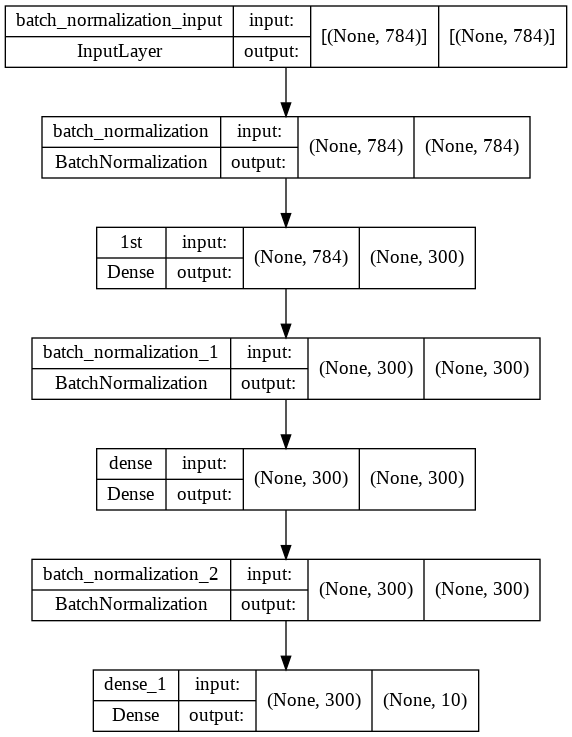

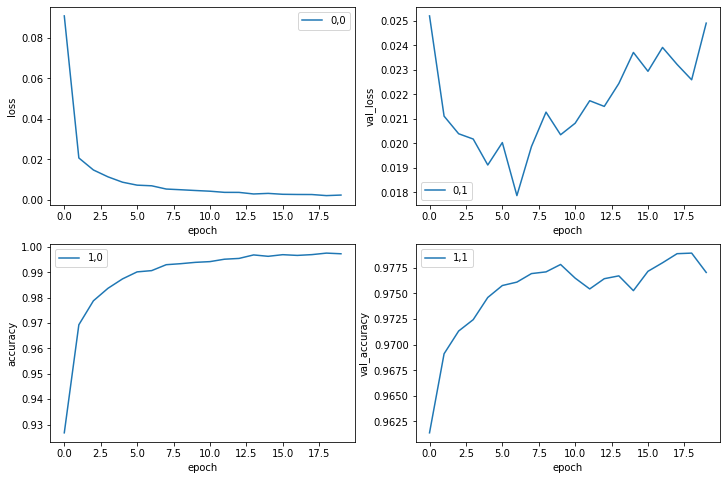

In [ ]:
# # Evaluate the model
# # scores = model.evaluate(train_data, train_label)
# scores = model.evaluate(test_data, test_label)

# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# plt.title('Learning Curves')
# plt.xlabel('Epoch')
# plt.ylabel('Cross Entropy')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.legend()
# plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
fig.subplots_adjust(hspace=0.2, wspace=0.2)

#fig.suptitle('aa')

axes[0,0].plot(history.history['loss'], label='0,0' )
axes[0,0].set_ylabel('loss')
axes[0,0].set_xlabel('epoch')
#axes[0,0].set_title('title')
#axes[0,0].set_yscale('log')

axes[0,1].plot(history.history['val_loss'], label='0,1' )
axes[0,1].set_ylabel('val_loss')
axes[0,1].set_xlabel('epoch')

axes[1,0].plot(history.history['accuracy'], label='1,0' )
axes[1,0].set_ylabel('accuracy')
axes[1,0].set_xlabel('epoch')

axes[1,1].plot(history.history['val_accuracy'], label='1,1' )
axes[1,1].set_ylabel('val_accuracy')
axes[1,1].set_xlabel('epoch')


for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('epoch', fontsize=10)
        axes[i,j].legend()

#plt.savefig('/content/drive/MyDrive/fig.png')
#fig.show()

#model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)